### Pulling the database

In [19]:
import pandas as pd
export_France_df = pd.read_csv(r'exportacoes_franca.csv')
display(export_France_df)


,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


#### By examining the Df, it seems that all lines are doubled, one for Economic block Europe and another for Economic block EU. In order check that , we choose one of them, in this case we went with Economic block EU

In [20]:
export_France_df = export_France_df[export_France_df['Economic Block'] == 'European Union (EU)']
display(export_France_df)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
5,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",European Union (EU),180914,57600
7,2016,1,France,Alta Floresta - MT,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,European Union (EU),47828,28306
9,2016,1,France,Ananindeua - PA,1211,Plants and parts of plants (including seeds an...,12,"Oil seeds and oleaginous fruits; Grains, Seeds...",European Union (EU),391,22
...,...,...,...,...,...,...,...,...,...,...,...
142351,2020,12,France,Vinhedo - SP,4016,Other articles of vulcanised rubber other than...,40,Rubber and articles thereof,European Union (EU),136,0
142353,2020,12,France,Vinhedo - SP,6806,"Slag wool, rock wool and similar mineral wools...",68,"Articles of stone, plaster, cement, asbestos, ...",European Union (EU),76,50
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400


#### Given how the number of rows is exactly half of the initial, our assumption was correct. Now we can start to analyse the data frame

### General information

How many rows does the DataFrame have? Is there an empty value that should be handled?

In [21]:
export_France_df.info()
num_rows = len(export_France_df)
nan_columns = export_France_df.columns[export_France_df.isnull().any()]

# display(nan_columns)
print('')
print(f"This Df have {num_rows} rows",end = ' ')

if nan_columns.empty:
    print("and no NaN columns.")
else:
    print(f"and {len(nan_columns)} columns with NaN values: {list(nan_columns)}")

<class 'pandas.core.frame.DataFrame'>
Index: 71180 entries, 1 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             71180 non-null  int64 
 1   Month            71180 non-null  int64 
 2   Country          71180 non-null  object
 3   City             71180 non-null  object
 4   SH4 Code         71180 non-null  int64 
 5   SH4 Description  71180 non-null  object
 6   SH2 Code         71180 non-null  int64 
 7   SH2 Description  71180 non-null  object
 8   Economic Block   71180 non-null  object
 9   US$ FOB          71180 non-null  int64 
 10  Net Weight       71180 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 6.5+ MB

This Df have 71180 rows and no NaN columns.


### How have exports to France evolved over the years?

,Year,Exports
0,2016,13489
1,2017,13397
2,2018,13750
3,2019,16039
4,2020,14505


,US$ FOB
Year,
2016,"US$ 2,307,750,041"
2017,"US$ 2,224,352,728"
2018,"US$ 2,619,712,208"
2019,"US$ 2,609,361,806"
2020,"US$ 1,983,797,405"


<Axes: >

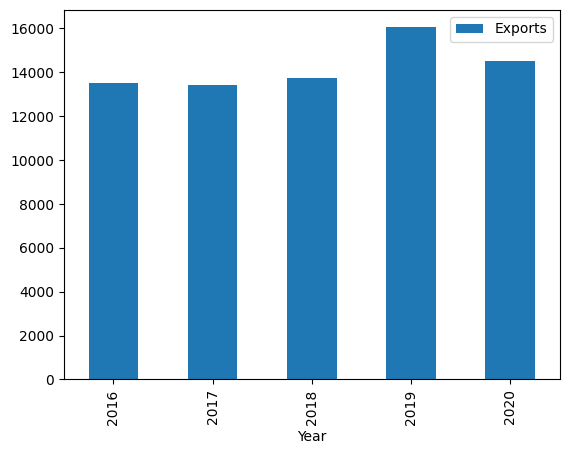

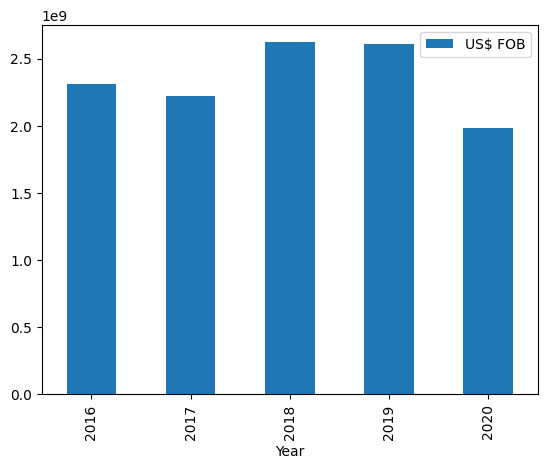

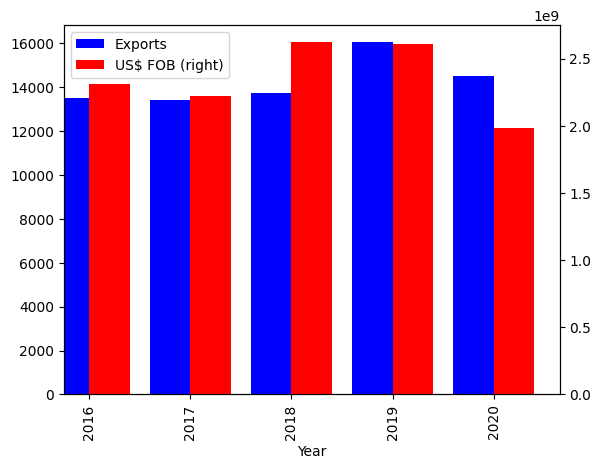

In [22]:
# Creating a table with the number of export over the years
change_over_years_number = export_France_df['Year'].value_counts().sort_index().reset_index()
change_over_years_number.columns = ['Year', 'Exports']
display(change_over_years_number)

# plotting it
change_over_years_number.plot(x='Year', y='Exports', kind='bar')

# Creating a table with the total income from the export over the years
change_over_years_value = export_France_df.groupby('Year').agg({'US$ FOB' : 'sum'})
change_over_years_value = change_over_years_value.sort_index()

# Creating a copy of the original table to format it to dollars
def format(value):
    return f"US$ {value:,}"
change_over_years_US = change_over_years_value.copy()
change_over_years_US['US$ FOB'] = change_over_years_US['US$ FOB'].apply(format)
display(change_over_years_US)

# Plotting the original table (Since the one with dollars can't be used as it's int became string)
change_over_years_value.plot(kind='bar')

# Creating a graph to help compare how both the number of exports and income have changed over the years
change_over_years = change_over_years_number.merge(change_over_years_value, on='Year')
ax = change_over_years.plot(x='Year', y='Exports', kind='bar', color='blue', position=1, width=0.4)
change_over_years.plot(x='Year', y='US$ FOB', kind='bar', color='red', position=0, width=0.4, ax=ax, secondary_y=True,)

### What are the most exported products throughout the period?

In [23]:
# Getting the products most exported by Dollar and weight
Most_sold_FOB_df = export_France_df.groupby('SH2 Description').agg({'Net Weight' : 'sum'}).sort_values(by='Net Weight', ascending=False)
Most_sold_weight_df = export_France_df.groupby('SH2 Description').agg({'US$ FOB' : 'sum'}).sort_values(by='US$ FOB', ascending=False)
display(Most_sold_weight_df)
display(Most_sold_FOB_df)

# getting the id and value of the product most exported in dollar
Most_sold_FOB_id = Most_sold_FOB_df.idxmax()
Most_sold_FOB = Most_sold_FOB_df.max()

# getting the id and value of the product most exported in weight
Most_sold_weight_id = Most_sold_weight_df.idxmax()
Most_sold_weight = Most_sold_weight_df.max()

print(f"The products '{Most_sold_FOB_id.iloc[0]}' was the one sold the most in dollars, totalling a sum of US$ {Most_sold_FOB.iloc[0] :,}")
print(f"The products '{Most_sold_weight_id.iloc[0]}' was the one sold the most in weight, totalling a sum of {Most_sold_weight.iloc[0]:,}")

,US$ FOB
SH2 Description,
Residues and waste from the food industries; others,2820749242
"Ores, slag and ash",1702176637
"Nuclear reactors, boilers, machinery and mechanical appliances; others",944890847
"Pulp of wood or of other fibrous cellulosic material, others,",927712321
"Aircraft, spacecraft, and parts thereof",626503855
...,...
"Umbrellas, sun umbrellas, walking-sticks, seat-sticks, whips, riding-crops, others",9436
Cork and articles of cork,5487
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric",1270


,Net Weight
SH2 Description,
"Ores, slag and ash",31747504402
Residues and waste from the food industries; others,8347339785
"Pulp of wood or of other fibrous cellulosic material, others,",1937505206
"Mineral fuels, mineral oils, bituminous substances; mineral waxes",1181022035
"Oil seeds and oleaginous fruits; Grains, Seeds, others",814617568
...,...
Prepared feathers and articles made of feathers or of down; others,80
Cork and articles of cork,73
Tin and articles thereof,20


The products 'Ores, slag and ash' was the one sold the most in dollars, totalling a sum of US$ 31,747,504,402
The products 'Residues and waste from the food industries; others' was the one sold the most in weight, totalling a sum of 2,820,749,242


### In 2020, which city exported the most to France in US$?

In [24]:
# Getting the cities that exported the most in 2020
export_per_city_df = export_France_df.query('`Year` == 2020')
export_per_city_df = export_per_city_df.groupby('City').agg({'US$ FOB' : 'sum'}).sort_values('US$ FOB',ascending=False)

# turning it's value to Dollar and displaying it
display_export_per_city_df=export_per_city_df['US$ FOB'].apply(format)
display(display_export_per_city_df)

# Getting the city that exported the most and total income from it
most_export_city_id = export_per_city_df.index[0]
most_export_city_value = export_per_city_df.iloc[0,0]

print(f'The city {most_export_city_id} exported the most in 2020, totalling US$ {most_export_city_value :,.2f}')


City
Duque de Caxias - RJ           US$ 139,702,798
Luís Eduardo Magalhães - BA    US$ 132,664,066
Ponta Grossa - PR               US$ 93,888,508
São José dos Campos - SP        US$ 86,469,638
Rio de Janeiro - RJ             US$ 61,261,107
                                    ...       
Não-Me-Toque - RS                       US$ 21
Cubatão - SP                            US$ 20
Holambra - SP                            US$ 5
São Sebastião do Caí - RS                US$ 3
Quatro Pontes - PR                       US$ 0
Name: US$ FOB, Length: 648, dtype: object

The city Duque de Caxias - RJ exported the most in 2020, totalling US$ 139,702,798.00


### What are the most exported products (in US$) that the 2 largest cities (in exports in 2020) exported?

In [25]:

# getting the second city that exported the most
second_most_export_city_id = export_per_city_df.index[1]

# Getting all products from the city that exported the most and displaying it
most_export_city_product = export_France_df.query('`Year` == 2020 and `City` == @most_export_city_id')
most_export_city_product = most_export_city_product.groupby('SH2 Description').agg({'US$ FOB' : 'sum'}).sort_values('US$ FOB', ascending = False)
print(f'Products most exported by the city {most_export_city_id}')
display(most_export_city_product)

print('')

# Getting all products from the second city that exported the most and displaying it
second_most_export_city_product = export_France_df.query('`Year` == 2020 and `City` == @second_most_export_city_id')
second_most_export_city_product = second_most_export_city_product.groupby('SH2 Description').agg({'US$ FOB' : 'sum'}).sort_values('US$ FOB', ascending = False)
print(f'Products most exported by the city {second_most_export_city_id}')
display(second_most_export_city_product)

print(f"The product most exported by {most_export_city_id}, the city that exported the most in 2020, was '{most_export_city_product.idxmax().iloc[0]}', totalling {most_export_city_product.max().iloc[0] :,.2f}")
print(f"The product most exported by {second_most_export_city_id}, the second city that exported the most in 2020, was '{second_most_export_city_product.idxmax().iloc[0]}', totalling {second_most_export_city_product.max().iloc[0] :,.2f}")

Products most exported by the city Duque de Caxias - RJ


,US$ FOB
SH2 Description,
"Nuclear reactors, boilers, machinery and mechanical appliances; others",92908491
"Mineral fuels, mineral oils, bituminous substances; mineral waxes",33677844
Articles of iron or steel,4559357
Residues and waste from the food industries; others,2007137
"Optical, photographic, cinematographic instruments; others",1506546
Nickel and articles thereof,1475643
Electrical machinery and equipment and parts thereof; others,1297524
Lead and articles thereof,830090
Rubber and articles thereof,689648



Products most exported by the city Luís Eduardo Magalhães - BA


,US$ FOB
SH2 Description,
Residues and waste from the food industries; others,132649904
Edible fruit and nuts; peel of citrus fruits or melons,14162


The product most exported by Duque de Caxias - RJ, the city that exported the most in 2020, was 'Nuclear reactors, boilers, machinery and mechanical appliances; others', totalling 92,908,491.00
The product most exported by Luís Eduardo Magalhães - BA, the second city that exported the most in 2020, was 'Residues and waste from the food industries; others', totalling 132,649,904.00
